# 決定木

In [37]:
!pip install --upgrade scikit-learn

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## 決定木モデル

決定木

決定木(回帰)
- sklearn.tree.DecisionTreeRegressor
    - max_depth: 木の深さ
    - min_samples_split: 最低限分割に必要なデータ数
    - ccp_alpha: cost complexity pruning のαの値を指定
- 使い方は他のskleanのモデルと同じ
- パラメータを指定しないと最後までぶんかつし過学習するので注意

決定木(分類)
- sklearn.tree.DecisionTreeClassifier
- 使い方は回帰と同じ

In [49]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [40]:
# データ準備
df = sns.load_dataset('tips')

# カテゴリデータをダミー変数化
df = pd.get_dummies(df, drop_first=True)

# X,y生成
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# model生成
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.1060246260428703

In [42]:
model.score(X_test, y_test) # R-Square

0.3590618660303134

In [43]:
model.score(X_test, y_pred) # R-Square

1.0

## 決定木の可視化

決定木の可視化
- sklearn.tree.plot_tree
    - decision_tree: モデルのインスタンス
    - fontsize: フォントのサイズを指定
    - feature_name: 特徴量の名前をリストで渡す(model.feature_names_in_が便利)
- sklearnのtreeモデルを引数にする
- 図の内容が戻り値で帰ってくる

決定木の可視化(テキスト)
- sklearn.tree.export_test
- 使い方はplot_treeと同じ
- print()関数に渡して表示することで綺麗に表示される

[Text(1260.6666666666667, 978.48, 'total_bill <= 20.49\nmse = 1.982\nsamples = 170\nvalue = 2.964'),
 Text(661.3333333333334, 761.0400000000001, 'total_bill <= 16.25\nmse = 0.706\nsamples = 105\nvalue = 2.355'),
 Text(330.6666666666667, 543.6, 'total_bill <= 13.145\nmse = 0.448\nsamples = 65\nvalue = 2.022'),
 Text(165.33333333333334, 326.1600000000001, 'total_bill <= 7.38\nmse = 0.468\nsamples = 42\nvalue = 1.869'),
 Text(82.66666666666667, 108.72000000000003, 'mse = 4.306\nsamples = 2\nvalue = 3.075'),
 Text(248.0, 108.72000000000003, 'mse = 0.2\nsamples = 40\nvalue = 1.808'),
 Text(496.0, 326.1600000000001, 'total_bill <= 15.21\nmse = 0.289\nsamples = 23\nvalue = 2.303'),
 Text(413.33333333333337, 108.72000000000003, 'mse = 0.298\nsamples = 16\nvalue = 2.471'),
 Text(578.6666666666667, 108.72000000000003, 'mse = 0.056\nsamples = 7\nvalue = 1.919'),
 Text(992.0, 543.6, 'smoker_No <= 0.5\nmse = 0.652\nsamples = 40\nvalue = 2.896'),
 Text(826.6666666666667, 326.1600000000001, 'total_bi

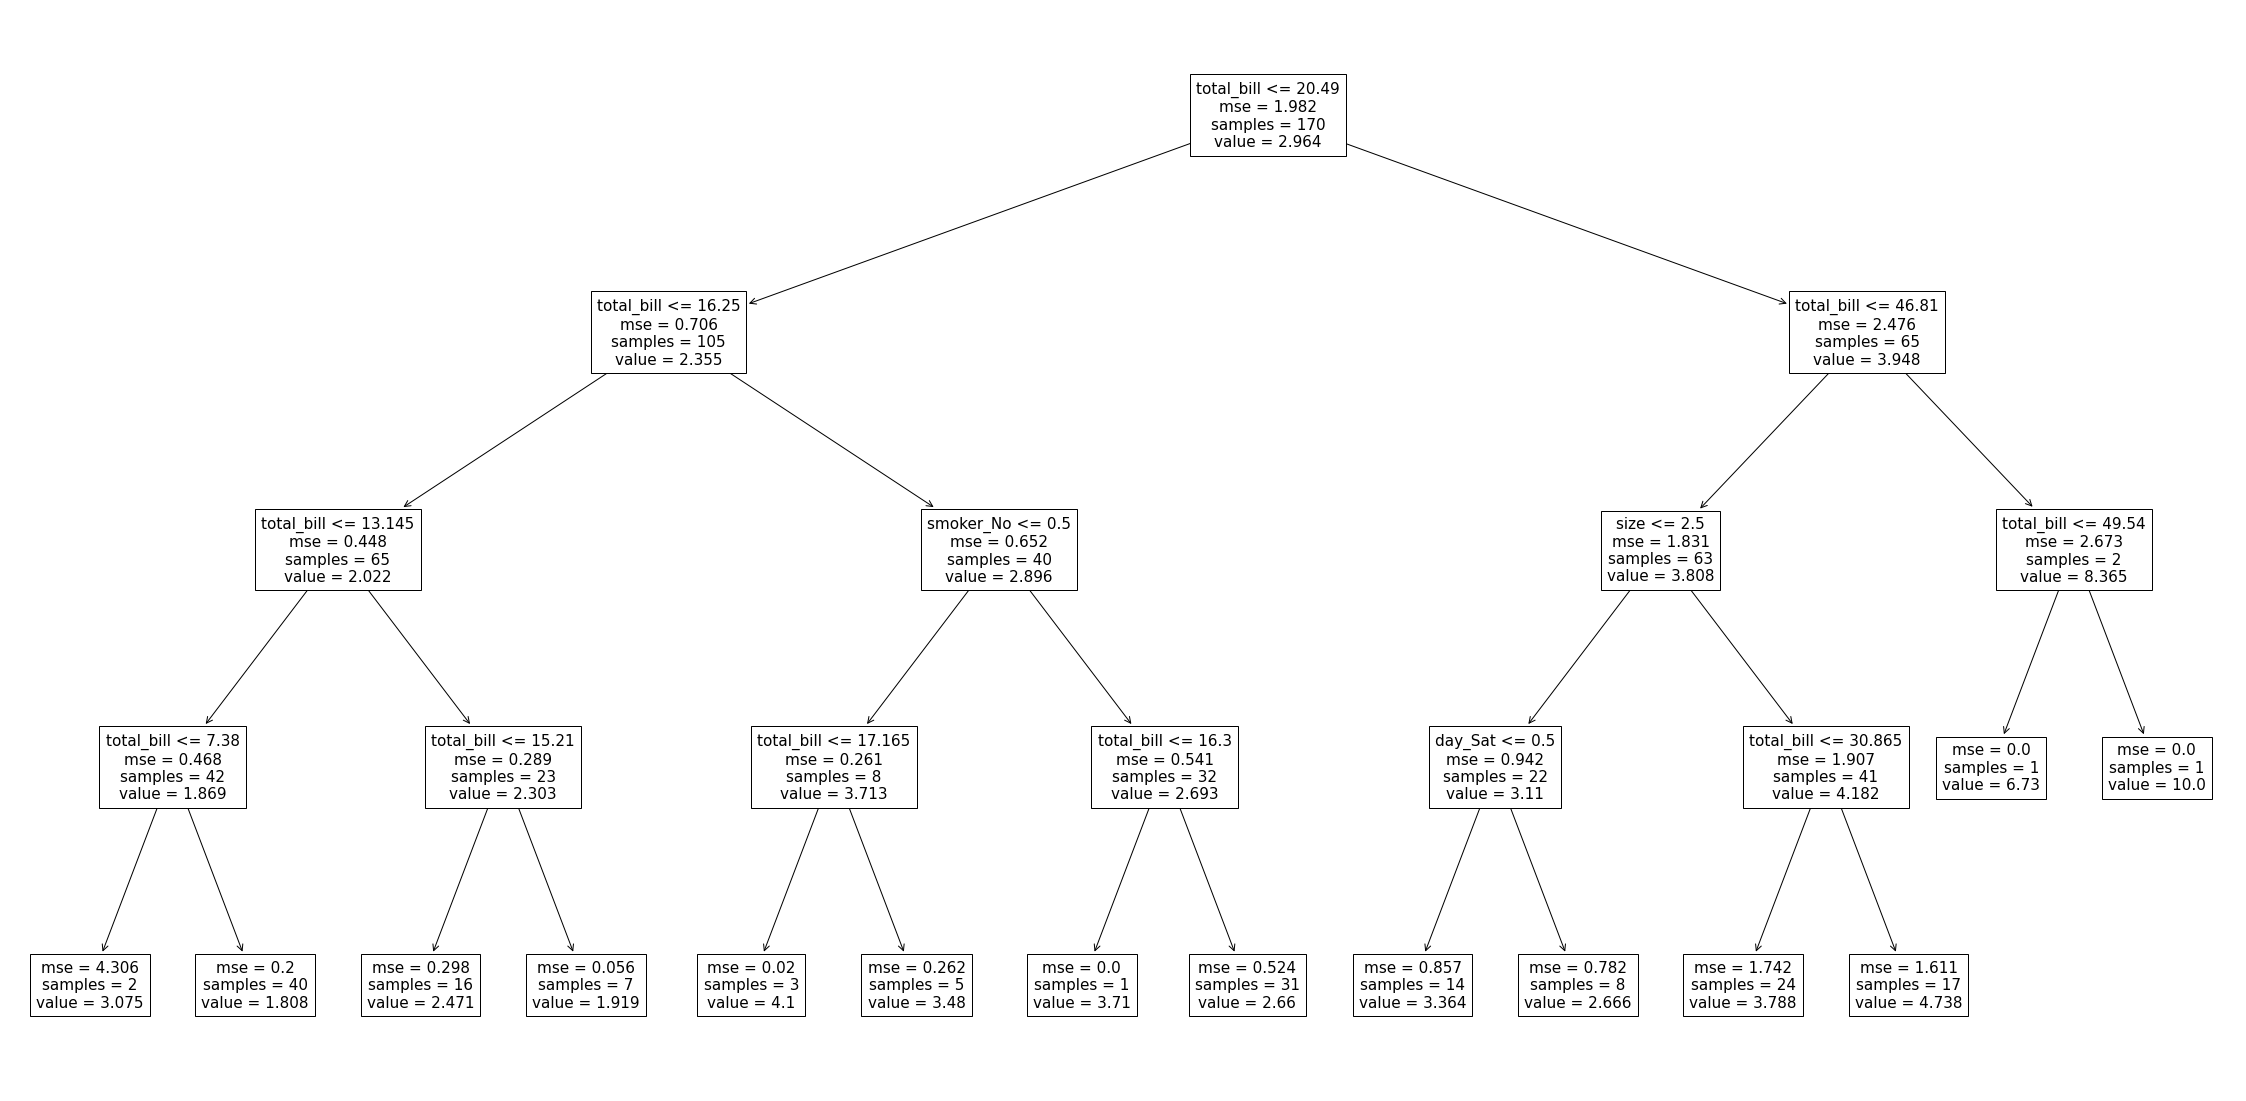

In [50]:
# 可視化
feature_names = list(X.columns)

plt.figure(figsize=(40, 20))
tree.plot_tree(model, feature_names=feature_names)
# tree.plot_tree(model, font_size=10, feature_names=model.feature_names_in_)

In [55]:
y_train.loc[X_train[X_train['total_bill'] > 20.49].index].mean()

3.948

In [51]:
# テキスト
print(tree.export_text(model, feature_names=feature_names))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

## 特徴量の重要度可視化

決定木の特徴量の重要度
- .feature_importances_属性で特徴量の重要度リストで取得

In [56]:
model.feature_importances_

array([0.87823592, 0.07825569, 0.        , 0.03169922, 0.        ,
       0.01180916, 0.        , 0.        ])

In [59]:
feature_names

['total_bill',
 'size',
 'sex_Female',
 'smoker_No',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Dinner']

<BarContainer object of 8 artists>

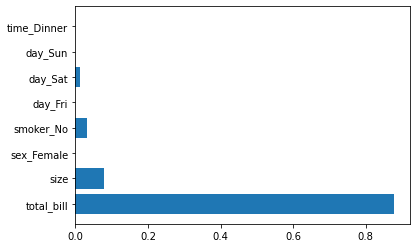

In [60]:
plt.barh(feature_names, model.feature_importances_)

## Minimal cost complexity pruning

- .cost_complexity_pruning_path(X, y)でαと不純度のリストを取得する
- それぞれのαでのモデルの精度を計測し、最良のαとする

In [64]:
model = tree.DecisionTreeRegressor(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)

In [69]:
eff_alphas = path.ccp_alphas

In [70]:
# αを可変しながらmodelを生成しmodelsに格納する
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)

In [77]:
# 学習データとテストデータの各モデルのMSE
from sklearn.metrics import mean_squared_error
train_scoreｓ = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scoreｓ = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

Text(0, 0.5, 'MSE')

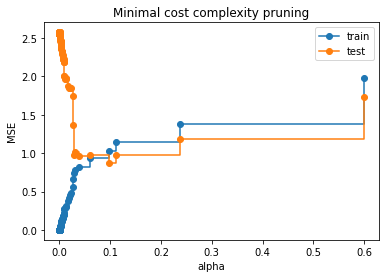

In [83]:
# 可視化
# αが0の時、学習が最後までなされているので、学習データに対する精度は高いが、テストデータに対する精度は低い（過学習気味）
# αが大きくなるにつれて木の剪定が進んでいくのでモデルが抽象化していく（varianceが下がり、テストデータの損失が最も小さくなる）
# さらにαが大きくなると、モデルの単純化が進み、単純すぎて正しく予測ができなくなっていく(biasが大きくなっていく)
plt.plot(eff_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(eff_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.title('Minimal cost complexity pruning')
plt.xlabel('alpha')
plt.ylabel('MSE')

In [71]:
models

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.0449157878825003e-17, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.5673736818237504e-17, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.411764705819825e-07, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.1764705882430014e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.7647058823514407e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.6470588235232426e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.6470588235310793e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.6470588235336916e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.6470588235336916e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.6470588235336916e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.647058823533692e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.6470588235519778e-06, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.64705882355459e-06, random_state=0),
 D

In [67]:
model.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.00000000e+00, 1.04491579e-17, 1.56737368e-17, 4.41176471e-07,
        1.17647059e-06, 1.76470588e-06, 2.64705882e-06, 2.64705882e-06,
        2.64705882e-06, 2.64705882e-06, 2.64705882e-06, 2.64705882e-06,
        2.64705882e-06, 2.64705882e-06, 3.67647059e-06, 7.35294118e-06,
        1.05882353e-05, 1.44117647e-05, 1.88235294e-05, 2.94117647e-05,
        4.23529412e-05, 5.76470588e-05, 5.76470588e-05, 7.52941176e-05,
        8.24509804e-05, 8.50000000e-05, 9.92647059e-05, 1.06176471e-04,
        1.29705882e-04, 1.34215686e-04, 1.42352941e-04, 1.69411765e-04,
        1.83823529e-04, 1.89803922e-04, 1.89803922e-04, 2.01323529e-04,
        2.14411765e-04, 2.16568627e-04, 2.33382353e-04, 2.40941176e-04,
        3.07247899e-04, 3.20294118e-04, 3.52941176e-04, 3.89117647e-04,
        4.10000000e-04, 4.52235294e-04, 4.94215686e-04, 5.50784314e-04,
        5.57098039e-04, 5.81252101e-04, 5.93137255e-04, 7.35294118e-04,
        7.65974026e-04, 7.94117647e-04, 8.71911765